# Data Selection #

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Testing the Random Forest Algorythm on The Same Data that it was Trained On #

[-2.84872467e-02  7.60135054e-03  4.16088961e-02  1.57292109e-01
 -6.59902579e-02 -1.54729746e-01 -1.13059691e-01  1.20448902e-01
 -3.33584905e-02 -4.22241395e-01 -1.96186987e-01 -2.31698364e-01
  7.66503182e-02 -1.38049475e-01  2.75845565e-01 -1.10058253e-01
 -3.64882367e-01  3.16403086e-01 -2.48930260e-02 -1.26220260e-01
 -9.30297731e-02  5.23818890e-02  6.01037131e-02  1.09390157e-01
  1.03589089e-01  6.20769048e-02  9.76147931e-02  1.34466350e-01
  1.63482349e-01  6.64168048e-02 -4.66563569e-02 -3.07774179e-02
  7.31550064e-03  1.39549308e-01  1.56602649e-02  4.65263228e-03
 -5.51667494e-02 -1.61880805e-01  5.07615495e-02 -1.00243710e-01
 -6.52904210e-02 -1.75098649e-01 -1.89280714e-01 -1.97393732e-02
  7.36669218e-02 -8.09741695e-05 -1.91488271e-01 -1.46656367e-02
 -1.98676646e-01  4.77898222e-02 -7.16869328e-02 -8.16027691e-02
  1.92360134e-03 -9.13098549e-02  1.48336743e-01  2.11116305e-02
  2.13586412e-01 -4.61942370e-02  1.11456846e-01 -9.43672237e-02
 -1.61158503e-01 -5.07266

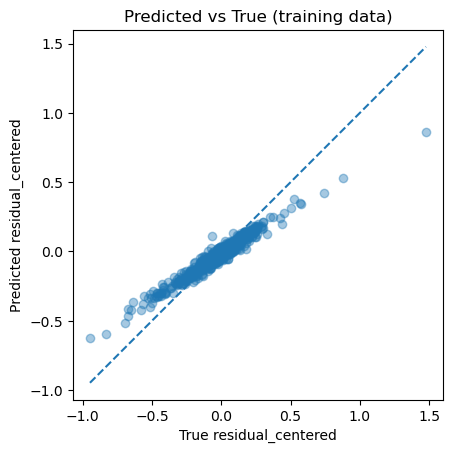

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("ZTF_DESI_data/ZTF_snia_DESI_fastspec_hostprops_papercuts_hostcuts.csv")

# ---------------------------------------------------------
# 2. Features + target
# ---------------------------------------------------------
features = [
    "LOGMSTAR",
    "SFR",
    "AGE",
    "DN4000",
    "VDISP",
    "SDSS_g_minus_r",
]

target = "residual_centered"

X = df[features]
y = df[target]

# ---------------------------------------------------------
# 3. Train Random Forest on ALL DATA
# ---------------------------------------------------------
regr = RandomForestRegressor(
    n_estimators=500,
    max_depth=200,
    random_state=42,
    n_jobs=-1,
)

regr.fit(X, y)

# ---------------------------------------------------------
# 4. Predict on ALL DATA
# ---------------------------------------------------------
y_pred = regr.predict(X)

print(y_pred)


plt.scatter(y, y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--")  # 1:1 line
plt.xlabel("True residual_centered")
plt.ylabel("Predicted residual_centered")
plt.title("Predicted vs True (training data)")
plt.gca().set_aspect("equal", "box")
plt.show()

# Doing a Train-Test Split on that Same Data #

[-0.00036056 -0.0046791  -0.10076657  0.02233628 -0.12102436  0.08773447
  0.01933236 -0.04351353 -0.01663468 -0.02586993 -0.02541018 -0.10926954
 -0.04570496 -0.07862075 -0.03075615 -0.02373736 -0.00041183 -0.06901152
 -0.01263542 -0.08065204 -0.13183627 -0.02293311 -0.00069935 -0.15997386
 -0.03739122  0.01807475 -0.10381639 -0.10570908  0.03781624 -0.04640241
 -0.06626701 -0.02445766 -0.13088454 -0.01346689  0.02823842 -0.04370372
  0.06636004 -0.13784551 -0.01363449 -0.05676703  0.01438861 -0.2169062
 -0.12200505  0.03545927 -0.07539793 -0.21252378 -0.04738961 -0.02425794
 -0.06119191  0.0377175   0.01051177 -0.07545688 -0.07221421 -0.04309231
  0.05454201  0.03244186 -0.13732634 -0.01467999  0.00471821 -0.07528671
 -0.01020462  0.01417121 -0.0795643  -0.15879016  0.02791125  0.06110175
 -0.21450519  0.0219733  -0.00761314 -0.12588389 -0.13168589 -0.11825286
  0.06698126  0.01426606 -0.09226746 -0.07675646  0.08166887  0.09892881
 -0.07181545 -0.06454062  0.08854551 -0.06820984 -0.

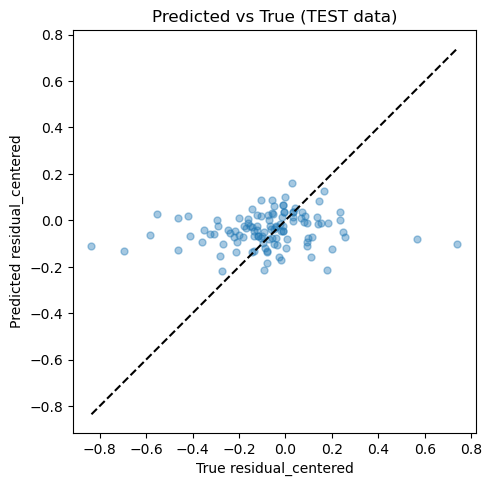

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv(
    "ZTF_DESI_data/ZTF_snia_DESI_fastspec_hostprops_papercuts_hostcuts.csv"
)

# ---------------------------------------------------------
# 2. Features + target
# ---------------------------------------------------------
features = [
    "LOGMSTAR",
    "SFR",
    "AGE",
    "DN4000",
    "VDISP",
    "SDSS_g_minus_r",
]

target = "residual_centered"

X = df[features]
y = df[target]

# ---------------------------------------------------------
# 3. Train/test split
# ---------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

# ---------------------------------------------------------
# 4. Train Random Forest on TRAINING DATA ONLY
# ---------------------------------------------------------
regr = RandomForestRegressor(
    n_estimators=1000,
    max_depth=1000,
    random_state=42,
    n_jobs=-1,
)

regr.fit(X_train, y_train)   # ✅ FIXED

# ---------------------------------------------------------
# 5. Predict ONLY on the TEST SET
# ---------------------------------------------------------
y_pred = regr.predict(X_test)  # ✅ FIXED

print(y_pred)

plt.figure(figsize=(5, 5))

plt.scatter(
    y_test,
    y_pred,
    alpha=0.4,
    s=25
)

lims = [
    min(y_test.min(), y_pred.min()),
    max(y_test.max(), y_pred.max()),
]

plt.plot(lims, lims, "--", color="black")  # 1:1 line

plt.xlabel("True residual_centered")
plt.ylabel("Predicted residual_centered")
plt.title("Predicted vs True (TEST data)")
plt.gca().set_aspect("equal", "box")

plt.tight_layout()
plt.show()


# Using the Color and the Stretch Parameters in Order to Train the ML algorythm - Testing on the Same Data we Trained On #

Please note tha tit is very important to use the following file as this is where the distance modulus is defined and computed uncorreced for color or stretch parameters. 

[ 1.34665144e+00 -2.83187539e-01  6.32661196e-02 -1.34737689e-01
  5.82402995e-02  1.74338525e-01  1.11174247e+00 -4.07258800e-01
 -6.98633722e-02  7.76560915e-01  2.19447068e-02 -3.51625193e-01
  1.31351597e-01 -2.12079629e-01  2.14896157e+00  5.46026149e-04
 -4.57267951e-01  2.95873435e-01 -5.64136554e-01  3.63360833e-02
 -3.36705749e-01 -5.09698084e-01 -4.48371976e-01 -1.12309731e-01
  8.26278633e-03  7.69676937e-02 -2.53785145e-01  2.87904879e-01
 -6.70811747e-02  6.70712561e-01  7.66117479e-02 -2.40638317e-01
 -1.65660818e-01 -2.23616554e-01  6.68709067e-01 -1.18502206e-01
 -3.08307403e-01 -2.19380482e-01  1.07236406e-01 -8.80671355e-03
 -3.51534493e-01 -1.05965233e-01  2.43026858e-01  8.54426470e-02
 -3.30897123e-01  1.50635905e-02 -1.06629815e-02  9.71373866e-03
  1.86486188e-01 -1.03006972e-01  4.98318841e-01  3.71575847e-01
  1.69241847e-01  2.06286416e-01  1.78478068e-01  3.24939852e-01
  7.55895617e-02  2.56084714e-01 -1.39258390e-01 -3.63307311e-01
 -8.08802527e-02 -1.88395

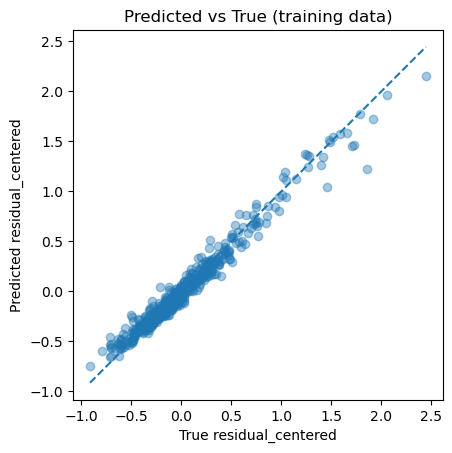

In [7]:
df = pd.read_csv("ZTF_DESI_data/ZTF_residuals_centered_no_x1_no_c_v2.csv")

# ---------------------------------------------------------
# 2. Features + target
# ---------------------------------------------------------
features = [
    "LOGMSTAR",
    "SFR",
    "AGE",
    "DN4000",
    "VDISP",
    "SDSS_g_minus_r",
    "x1",
    "c",
]

target = "residual_centered"

X = df[features]
y = df[target]

# ---------------------------------------------------------
# 3. Train Random Forest on ALL DATA
# ---------------------------------------------------------
regr = RandomForestRegressor(
    n_estimators=500,
    max_depth=200,
    random_state=42,
    n_jobs=-1,
)

regr.fit(X, y)

# ---------------------------------------------------------
# 4. Predict on ALL DATA
# ---------------------------------------------------------
y_pred = regr.predict(X)

print(y_pred)


plt.scatter(y, y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--")  # 1:1 line
plt.xlabel("True residual_centered")
plt.ylabel("Predicted residual_centered")
plt.title("Predicted vs True (training data)")
plt.gca().set_aspect("equal", "box")
plt.show()

# Using the Color and the Stretch Parameters in Order to Train the ML algorythm - Testing on the Same Data We Trained On - Just c and x1 #


[ 1.37453093e+00 -2.46372154e-01  1.96499588e-02 -1.20279061e-01
  1.68660764e-02  1.45393340e-01  1.10084886e+00 -3.91941249e-01
 -9.86377820e-02  7.61521722e-01  5.41731498e-02 -3.20236516e-01
  1.43854818e-01 -2.32325897e-01  2.22972281e+00  1.44543595e-02
 -5.09060642e-01  2.88176189e-01 -5.58847832e-01  5.41162522e-02
 -3.57330330e-01 -5.34684994e-01 -4.54303068e-01 -1.40410098e-01
  6.54310463e-03  6.89252451e-02 -2.56969934e-01  2.44552528e-01
 -1.09277454e-01  6.09307251e-01  8.80914464e-02 -2.74976895e-01
 -1.82837741e-01 -2.45475185e-01  6.46737674e-01 -1.29854510e-01
 -2.91511206e-01 -2.16285391e-01  9.40509585e-02  4.08418596e-02
 -3.30033004e-01 -7.59236736e-02  2.87269970e-01  1.23953560e-01
 -3.63044556e-01  5.08084608e-02 -5.25996007e-02  4.05374499e-02
  2.18106670e-01 -1.13035653e-01  4.80680590e-01  3.97584272e-01
  1.35904389e-01  2.27536879e-01  2.12241300e-01  3.75296971e-01
  8.02271802e-02  2.76091880e-01 -1.29155946e-01 -4.42924402e-01
 -3.34455970e-02 -2.05589

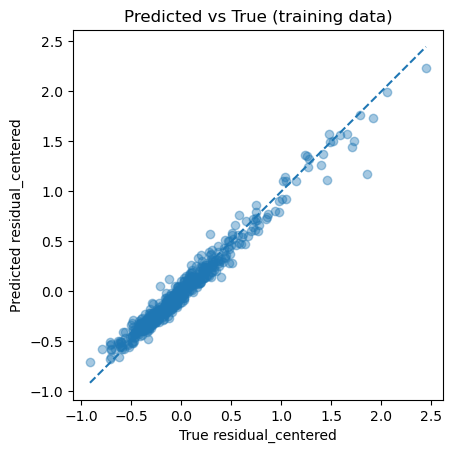

In [12]:
df = pd.read_csv("ZTF_DESI_data/ZTF_residuals_centered_no_x1_no_c_v2.csv")

# ---------------------------------------------------------
# 2. Features + target
# ---------------------------------------------------------
features = [
    # "LOGMSTAR",
    # "SFR",
    # "AGE",
    # "DN4000",
    # "VDISP",
    # "SDSS_g_minus_r",
    "x1",
    "c",
]

target = "residual_centered"

X = df[features]
y = df[target]

# ---------------------------------------------------------
# 3. Train Random Forest on ALL DATA
# ---------------------------------------------------------
regr = RandomForestRegressor(
    n_estimators=500,
    max_depth=200,
    random_state=42,
    n_jobs=-1,
)

regr.fit(X, y)

# ---------------------------------------------------------
# 4. Predict on ALL DATA
# ---------------------------------------------------------
y_pred = regr.predict(X)

print(y_pred)


plt.scatter(y, y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--")  # 1:1 line
plt.xlabel("True residual_centered")
plt.ylabel("Predicted residual_centered")
plt.title("Predicted vs True (training data)")
plt.gca().set_aspect("equal", "box")
plt.show()

# Now We're Going to Do a Train Test Split for Data that contains c and x1 #

[-9.65699030e-02 -6.95432038e-02  1.40817277e-01 -2.09634408e-01
 -1.00987786e-01 -1.00517791e-01 -4.06571337e-02  8.75841941e-02
  3.29726436e-02  9.30311710e-02 -3.11923035e-03 -1.39036527e-01
 -8.47163977e-03 -1.02925721e-01  3.20837181e-02  6.65469247e-02
 -8.95649852e-02  1.91411296e-01  5.43534166e-02 -4.31205645e-02
 -3.25635649e-01 -9.80999118e-02  1.02201457e-01 -2.40056142e-01
  1.50498451e-01 -5.05108890e-02 -1.56367909e-02 -1.26727749e-02
 -2.67606364e-02 -1.98821220e-02 -2.66079325e-02  4.25432460e-02
 -8.27059936e-02  3.50138281e-02  3.65476741e-04 -2.25854671e-01
 -1.67108163e-01 -1.69705049e-01 -1.59937269e-01 -3.43707617e-02
 -3.29511922e-02 -1.41223674e-01  9.42803408e-02 -2.20745696e-01
 -4.68428330e-02 -8.66780012e-02 -8.96718202e-03  3.36312839e-03
 -3.26702081e-02  4.06845202e-02 -2.46718105e-01  4.43909401e-02
  1.04230665e-01 -3.81833838e-02 -2.78801085e-01 -2.19312085e-02
 -1.77548492e-01  2.25456643e-02  1.55320352e-02 -1.11241288e-01
 -1.54882538e-01 -1.22922

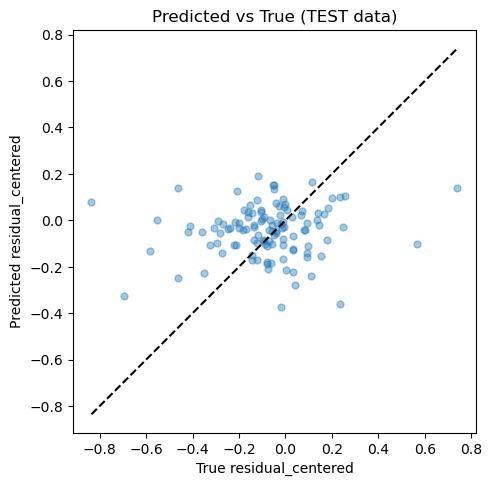

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv(
    "ZTF_DESI_data/ZTF_snia_DESI_fastspec_hostprops_papercuts_hostcuts.csv"
)

# ---------------------------------------------------------
# 2. Features + target
# ---------------------------------------------------------
features = [
    # "LOGMSTAR",
    # "SFR",
    # "AGE",
    # "DN4000",
    # "VDISP",
    # "SDSS_g_minus_r",
    "x1",
    "c",
]

target = "residual_centered"

X = df[features]
y = df[target]

# ---------------------------------------------------------
# 3. Train/test split
# ---------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

# ---------------------------------------------------------
# 4. Train Random Forest on TRAINING DATA ONLY
# ---------------------------------------------------------
regr = RandomForestRegressor(
    n_estimators=500,
    max_depth=500,
    random_state=42,
    n_jobs=-1,
)

regr.fit(X_train, y_train)   # ✅ FIXED

# ---------------------------------------------------------
# 5. Predict ONLY on the TEST SET
# ---------------------------------------------------------
y_pred = regr.predict(X_test)  # ✅ FIXED

print(y_pred)

plt.figure(figsize=(5, 5))

plt.scatter(
    y_test,
    y_pred,
    alpha=0.4,
    s=25
)

lims = [
    min(y_test.min(), y_pred.min()),
    max(y_test.max(), y_pred.max()),
]

plt.plot(lims, lims, "--", color="black")  # 1:1 line

plt.xlabel("True residual_centered")
plt.ylabel("Predicted residual_centered")
plt.title("Predicted vs True (TEST data)")
plt.gca().set_aspect("equal", "box")

plt.tight_layout()
plt.show()
